In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
from scipy.spatial.distance import cdist
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

In [2]:
df = pd.read_csv("/Users/HP/Documents/Power Systems Research/Event 3.csv", skiprows=[0,1,2,4]) # put whatever event 3 is
df

Time   C_CTWE5_A   C_CTWE5_B   C_CTWE5_C   C_CTWE5_N   V_PTWE4_AN  \
0             0    -0.00433    -0.00151    -0.00162   -0.000095       0.0451   
1           208    -0.00433    -0.00151    -0.00162   -0.000095       0.0451   
2           417    -2.95000     0.12900     2.90000   -0.086500     185.0000   
3           625   -59.60000     0.95300    60.30000   -1.700000    4820.0000   
4           833  -122.00000    -8.76000   132.00000   -1.750000   11400.0000   
...         ...         ...         ...         ...         ...          ...   
96001  20000080  -107.00000     2.91000   104.00000    0.141000   10000.0000   
96002  20000289  -102.00000    -6.67000   109.00000    0.151000    9570.0000   
96003  20000497   -96.80000   -16.20000   113.00000    0.159000    9050.0000   
96004  20000705   -90.60000   -25.70000   116.00000    0.167000    8470.0000   
96005  20000914   -83.80000   -35.00000   119.00000    0.175000    7840.0000   

        V_PTWE4_BN   V_PTWE4_CN   C_CTWE1_A   C_CTWE1_B  ...   V_PT_FDR32_CN  \
0           0.0673       -0.245    -0.00055     0.00031  ...         -0.0233   
1           0.0673       -0.245    -0.00055     0.00031  ...         -0.0233   
2           9.0200     -192.000    -0.14800     0.07700  ...        -14.1000   
3         238.0000    -5050.000    -4.28000     2.17000  ...      -1570.0000   
4        1070.0000   -12400.000   -13.10000     6.15000  ...      -7040.0000   
...            ...          ...         ...         ...  ...             ...   
96001    -246.0000    -9790.000   -31.00000    23.60000  ...      -7590.0000   
96002     647.0000   -10200.000   -31.60000    21.70000  ...      -8080.0000   
96003    1540.0000   -10600.000   -32.00000    19.70000  ...      -8520.0000   
96004    2420.0000   -10900.000   -32.20000    17.60000  ...      -8910.0000   
96005    3280.0000   -11100.000   -32.20000    15.40000  ...      -9250.0000   

        C_CT_FDR32_A   C_CT_FDR32_B   C_CT_FDR32_C   V_PT_FDR12_AN  \
0          -0.000081       0.000039       0.000175         -0.0811   
1          -0.000081       0.000039       0.000175         -0.0811   
2           0.010300      -0.000550      -0.010100         21.5000   
3           0.698000      -0.047000      -0.680000       1770.0000   
4           2.320000      -0.005850      -2.380000       6820.0000   
...              ...            ...            ...             ...   
96001      13.300000      -6.170000      -7.110000       9710.0000   
96002      13.200000      -5.220000      -7.940000       9400.0000   
96003      13.000000      -4.240000      -8.730000       9040.0000   
96004      12.700000      -3.230000      -9.470000       8610.0000   
96005      12.300000      -2.200000     -10.100000       8130.0000   

        V_PT_FDR12_BN   V_PT_FDR12_CN   C_CT_FDR12_A   C_CT_FDR12_B  \
0               0.134         -0.0558        -0.0013       0.000744   
1               0.134         -0.0558        -0.0013       0.000744   
2               0.458        -21.4000        -0.0853       0.004690   
3              22.800      -1780.0000        -6.5300       0.265000   
4              40.700      -7330.0000       -30.2000      -0.263000   
...               ...             ...            ...            ...   
96001       -1950.000      -7750.0000      -123.0000      34.500000   
96002       -1140.000      -8240.0000      -120.0000      24.600000   
96003        -328.000      -8670.0000      -116.0000      14.600000   
96004         491.000      -9060.0000      -112.0000       4.530000   
96005        1310.000      -9380.0000      -107.0000      -5.580000   

        C_CT_FDR12_C  
0            0.00124  
1            0.00124  
2            0.08550  
3            6.45000  
4           30.90000  
...              ...  
96001       88.90000  
96002       95.60000  
96003      102.00000  
96004      107.00000  
96005      112.00000  

[96006 rows x 92 columns]

In [3]:
test_path = "Attack_Faults_001.csv"
df_test = pd.read_csv(f"/Users/HP/Documents/Power Systems Research/{test_path}.csv", skiprows=[0,1,2,4]) # put whatever event 1 is

df_test

Time   C_CTWE5_A   C_CTWE5_B   C_CTWE5_C   C_CTWE5_N   V_PTWE4_AN  \
0             0     -0.0149    -0.00584    -0.00172     -0.0135       0.0451   
1           208     -0.0149    -0.00584    -0.00172     -0.0135       0.0451   
2           417     -2.9600     0.12500     2.90000     -0.0986     185.0000   
3           625    -59.6000     0.96200    60.30000     -1.7200    4820.0000   
4           833   -122.0000    -8.75000   132.00000     -1.7400   11400.0000   
...         ...         ...         ...         ...         ...          ...   
96001  20000080   -107.0000     2.92000   104.00000      0.1280   10000.0000   
96002  20000289   -102.0000    -6.68000   109.00000      0.1570    9570.0000   
96003  20000497    -96.8000   -16.20000   113.00000      0.1570    9050.0000   
96004  20000705    -90.6000   -25.70000   116.00000      0.1570    8470.0000   
96005  20000914    -83.8000   -35.00000   119.00000      0.1850    7840.0000   

        V_PTWE4_BN   V_PTWE4_CN   C_CTWE1_A   C_CTWE1_B  ...   V_PT_FDR32_CN  \
0           0.0673       -0.245    -0.00055    0.000208  ...         -0.0233   
1           0.0673       -0.245    -0.00055    0.000208  ...         -0.0233   
2           9.0200     -192.000    -0.14800    0.077300  ...        -14.1000   
3         238.0000    -5050.000    -4.28000    2.170000  ...      -1570.0000   
4        1070.0000   -12400.000   -13.10000    6.150000  ...      -7040.0000   
...            ...          ...         ...         ...  ...             ...   
96001    -246.0000    -9790.000   -31.00000   23.600000  ...      -7590.0000   
96002     647.0000   -10200.000   -31.60000   21.700000  ...      -8080.0000   
96003    1540.0000   -10600.000   -32.00000   19.700000  ...      -8520.0000   
96004    2420.0000   -10900.000   -32.20000   17.600000  ...      -8910.0000   
96005    3280.0000   -11100.000   -32.20000   15.400000  ...      -9250.0000   

        C_CT_FDR32_A   C_CT_FDR32_B   C_CT_FDR32_C   V_PT_FDR12_AN  \
0          -0.000081       0.000171       0.000163        0.000265   
1          -0.000081       0.000171       0.000163        0.000265   
2           0.010300      -0.000447      -0.010100       21.600000   
3           0.698000      -0.047500      -0.680000     1770.000000   
4           2.320000      -0.005400      -2.380000     6820.000000   
...              ...            ...            ...             ...   
96001      13.300000      -6.170000      -7.110000     9710.000000   
96002      13.200000      -5.220000      -7.940000     9400.000000   
96003      13.000000      -4.240000      -8.730000     9040.000000   
96004      12.700000      -3.230000      -9.470000     8610.000000   
96005      12.400000      -2.210000     -10.100000     8130.000000   

        V_PT_FDR12_BN   V_PT_FDR12_CN   C_CT_FDR12_A   C_CT_FDR12_B  \
0              -0.150         0.00251       -0.00124      -0.000322   
1              -0.150         0.00251       -0.00124      -0.000322   
2               0.555       -21.60000       -0.08520      -0.000322   
3              22.700     -1780.00000       -6.53000       0.252000   
4              40.700     -7330.00000      -30.20000      -0.253000   
...               ...             ...            ...            ...   
96001       -1950.000     -7750.00000     -123.00000      34.500000   
96002       -1140.000     -8240.00000     -120.00000      24.600000   
96003        -328.000     -8670.00000     -116.00000      14.600000   
96004         491.000     -9060.00000     -112.00000       4.550000   
96005        1310.000     -9380.00000     -107.00000      -5.600000   

        C_CT_FDR12_C  
0            -0.0151  
1            -0.0151  
2             0.0864  
3             6.4500  
4            30.9000  
...              ...  
96001        88.9000  
96002        95.6000  
96003       102.0000  
96004       107.0000  
96005       112.0000  

[96006 rows x 92 columns]

In [4]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = df[df['Time'] > 0.25e6].iloc[:, 1:]
data

C_CTWE5_A   C_CTWE5_B   C_CTWE5_C   C_CTWE5_N   V_PTWE4_AN  \
1201       -104.0       -3.02       107.0       0.145       9770.0   
1202        -99.1      -12.60       112.0       0.163       9260.0   
1203        -93.1      -22.20       115.0       0.181       8710.0   
1204        -86.5      -31.60       118.0       0.196       8090.0   
1205        -79.4      -40.80       120.0       0.212       7430.0   
...           ...         ...         ...         ...          ...   
96001      -107.0        2.91       104.0       0.141      10000.0   
96002      -102.0       -6.67       109.0       0.151       9570.0   
96003       -96.8      -16.20       113.0       0.159       9050.0   
96004       -90.6      -25.70       116.0       0.167       8470.0   
96005       -83.8      -35.00       119.0       0.175       7840.0   

        V_PTWE4_BN   V_PTWE4_CN   C_CTWE1_A   C_CTWE1_B   C_CTWE1_C  ...  \
1201         307.0     -10100.0       -30.1        21.1        9.02  ...   
1202        1200.0     -10500.0       -30.6        19.2       11.30  ...   
1203        2090.0     -10800.0       -30.8        17.2       13.50  ...   
1204        2970.0     -11100.0       -30.8        15.1       15.70  ...   
1205        3820.0     -11300.0       -30.7        13.0       17.70  ...   
...            ...          ...         ...         ...         ...  ...   
96001       -246.0      -9790.0       -31.0        23.6        7.48  ...   
96002        647.0     -10200.0       -31.6        21.7        9.91  ...   
96003       1540.0     -10600.0       -32.0        19.7       12.30  ...   
96004       2420.0     -10900.0       -32.2        17.6       14.60  ...   
96005       3280.0     -11100.0       -32.2        15.4       16.80  ...   

        V_PT_FDR32_CN   C_CT_FDR32_A   C_CT_FDR32_B   C_CT_FDR32_C  \
1201          -8230.0           13.4          -5.26          -8.12   
1202          -8690.0           13.2          -4.26          -8.92   
1203          -9080.0           12.9          -3.24          -9.66   
1204          -9430.0           12.5          -2.19         -10.40   
1205          -9710.0           12.1          -1.14         -11.00   
...               ...            ...            ...            ...   
96001         -7590.0           13.3          -6.17          -7.11   
96002         -8080.0           13.2          -5.22          -7.94   
96003         -8520.0           13.0          -4.24          -8.73   
96004         -8910.0           12.7          -3.23          -9.47   
96005         -9250.0           12.3          -2.20         -10.10   

        V_PT_FDR12_AN   V_PT_FDR12_BN   V_PT_FDR12_CN   C_CT_FDR12_A  \
1201           9580.0         -1220.0         -8330.0          -86.5   
1202           9210.0          -389.0         -8780.0          -83.9   
1203           8780.0           442.0         -9180.0          -80.8   
1204           8300.0          1270.0         -9520.0          -77.3   
1205           7770.0          2090.0         -9800.0          -73.2   
...               ...             ...             ...            ...   
96001          9710.0         -1950.0         -7750.0         -123.0   
96002          9400.0         -1140.0         -8240.0         -120.0   
96003          9040.0          -328.0         -8670.0         -116.0   
96004          8610.0           491.0         -9060.0         -112.0   
96005          8130.0          1310.0         -9380.0         -107.0   

        C_CT_FDR12_B   C_CT_FDR12_C  
1201           19.90           66.5  
1202           12.90           71.0  
1203            5.73           75.1  
1204           -1.46           78.7  
1205           -8.63           81.8  
...              ...            ...  
96001          34.50           88.9  
96002          24.60           95.6  
96003          14.60          102.0  
96004           4.53          107.0  
96005          -5.58          112.0  

[94805 rows x 91 columns]

In [5]:
# remove first 0.25 seconds to allow system to stabilise before using test data
data_test_in = df_test[df_test['Time'] > 0.25e6].iloc[:, 1:]
data_test_in

C_CTWE5_A   C_CTWE5_B   C_CTWE5_C   C_CTWE5_N   V_PTWE4_AN  \
1201       -104.0       -3.01       107.0       0.157       9770.0   
1202        -99.1      -12.60       112.0       0.157       9260.0   
1203        -93.1      -22.20       115.0       0.185       8710.0   
1204        -86.5      -31.60       118.0       0.185       8090.0   
1205        -79.4      -40.80       120.0       0.214       7430.0   
...           ...         ...         ...         ...          ...   
96001      -107.0        2.92       104.0       0.128      10000.0   
96002      -102.0       -6.68       109.0       0.157       9570.0   
96003       -96.8      -16.20       113.0       0.157       9050.0   
96004       -90.6      -25.70       116.0       0.157       8470.0   
96005       -83.8      -35.00       119.0       0.185       7840.0   

        V_PTWE4_BN   V_PTWE4_CN   C_CTWE1_A   C_CTWE1_B   C_CTWE1_C  ...  \
1201         307.0     -10100.0       -30.1        21.1        9.02  ...   
1202        1200.0     -10500.0       -30.6        19.2       11.30  ...   
1203        2090.0     -10800.0       -30.8        17.2       13.50  ...   
1204        2970.0     -11100.0       -30.8        15.2       15.70  ...   
1205        3820.0     -11300.0       -30.7        13.0       17.70  ...   
...            ...          ...         ...         ...         ...  ...   
96001       -246.0      -9790.0       -31.0        23.6        7.48  ...   
96002        647.0     -10200.0       -31.6        21.7        9.91  ...   
96003       1540.0     -10600.0       -32.0        19.7       12.30  ...   
96004       2420.0     -10900.0       -32.2        17.6       14.60  ...   
96005       3280.0     -11100.0       -32.2        15.4       16.80  ...   

        V_PT_FDR32_CN   C_CT_FDR32_A   C_CT_FDR32_B   C_CT_FDR32_C  \
1201          -8230.0           13.4          -5.26          -8.12   
1202          -8690.0           13.2          -4.26          -8.92   
1203          -9080.0           12.9          -3.24          -9.66   
1204          -9430.0           12.5          -2.19         -10.40   
1205          -9710.0           12.1          -1.14         -11.00   
...               ...            ...            ...            ...   
96001         -7590.0           13.3          -6.17          -7.11   
96002         -8080.0           13.2          -5.22          -7.94   
96003         -8520.0           13.0          -4.24          -8.73   
96004         -8910.0           12.7          -3.23          -9.47   
96005         -9250.0           12.4          -2.21         -10.10   

        V_PT_FDR12_AN   V_PT_FDR12_BN   V_PT_FDR12_CN   C_CT_FDR12_A  \
1201           9580.0         -1220.0         -8330.0          -86.5   
1202           9210.0          -389.0         -8780.0          -83.9   
1203           8780.0           442.0         -9180.0          -80.8   
1204           8300.0          1270.0         -9520.0          -77.3   
1205           7770.0          2090.0         -9800.0          -73.2   
...               ...             ...             ...            ...   
96001          9710.0         -1950.0         -7750.0         -123.0   
96002          9400.0         -1140.0         -8240.0         -120.0   
96003          9040.0          -328.0         -8670.0         -116.0   
96004          8610.0           491.0         -9060.0         -112.0   
96005          8130.0          1310.0         -9380.0         -107.0   

        C_CT_FDR12_B   C_CT_FDR12_C  
1201           20.00           66.5  
1202           12.90           71.0  
1203            5.74           75.1  
1204           -1.44           78.7  
1205           -8.63           81.8  
...              ...            ...  
96001          34.50           88.9  
96002          24.60           95.6  
96003          14.60          102.0  
96004           4.55          107.0  
96005          -5.60          112.0  

[94805 rows x 91 columns]

In [6]:
adj_list = {1:[29,65], 2:[30,66], 3:[31,67], 5:[12,26,19,62], 6:[13,27,20,63], 7:[14,28,21,64], 8:[15,22], 9:[16,23], 10:[17,24], 12:[5,26,33], 13:[6,27,34], 14:[7,28,35], 15:[8,29,52], 16:[9,53,30], 17:[10,54,31], 19:[26,5,33], 20:[27,34,6], 21:[28,35,7], 22:[8,36], 23:[9,37], 24:[10,38], 26:[12,33,5,19], 27:[13,20,34,6], 28:[14,21,35,7], 29:[1,65,15,48], 30:[2,66,49,16], 31:[3,67,50,17], 33:[56,19,26,12], 34:[57,13,27,20], 35:[58,14,28,21], 36:[22,40], 37:[23,41], 38:[24,42], 40:[36,48], 41:[37,49], 42:[38,50],44:[52,59],45:[53,60],46:[54,61],48:[40,52,29],49:[53,30,41],50:[31,42,54],52:[44,59,48,15],53:[45,60,49,16],54:[17,50,46,61],56:[33,74,68,59],57:[34,75,69,60],58:[35,76,70,61],59:[71,77,44,52,56],60:[45,78,72,53,57],61:[46,79,73,54,58],62:[5,86,80,65],63:[6,87,81,66],64:[7,88,82,67],65:[29,1,89,83,62],66:[2,30,90,84,63],67:[85,91,3,31,64],68:[56,74,71],69:[57,75,72],70:[58,76,73],71:[59,77,68],72:[60,78,69],73:[79,61,70],74:[56,68,77],75:[57,69,78],76:[58,70,79],77:[74,59,71],78:[60,72,75],79:[61,73,76],80:[62,86,83],81:[63,87,84],82:[64,88,85],83:[89,65,80],84:[90,66,81],85:[91,67,82],86:[62,80,89],87:[63,81,90],88:[64,82,91],89:[86,65,83],90:[66,84,87],91:[85,67,88]}
#adjacency list mapping out node:[neighbors]

# note: this adjacency matrix is 0 on the diagonal
# adj_matrix = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]])

findex_mapping = [(1, 'C_CTWE5_A'), (2, 'C_CTWE5_B'), (3, 'C_CTWE5_C'), (4, 'C_CTWE5_N'), (5, 'V_PTWE4_AN'), (6, 'V_ PTWE4_BN'), (7, 'V_ PTWE4_CN'), (8, 'C_CTWE1_A'), (9, 'C_CTWE1_B'), (10, 'C_CTWE1_C'), (11, 'C_CTWE1_N'), (12, 'V_PTWE1_AN'), (13, 'V_ PTWE1_BN'), (14, 'V_ PTWE1_CN'), (15, 'C_CTWE9_A'), (16, 'C_CTWE9_B'), (17, 'C_CTWE9_C'), (18, 'C_CTWE9_N'), (19, 'V_PTWE3_AN'), (20, 'V_ PTWE3_BN'), (21, 'V_ PTWE3_CN'), (22, 'C_CTWE3_A'), (23, 'C_ CTWE3_B'), (24, 'C_ CTWE3_C'), (25, 'C_ CTWE3_N'), (26, 'V_PTWE2_AN'), (27, 'V_ PTWE2_BN'), (28, 'V_ PTWE2_CN'), (29, 'C_CTWE7_A'), (30, 'C_CTWE7_B'), (31, 'C_CTWE7_C'), (32, 'C_CTWE7_N'), (33, 'V_PTWE5_AN'), (34, 'V_ PTWE5_BN'), (35, 'V_ PTWE5_CN'), (36, 'C_CTWE2_A'), (37, 'C_ CTWE2_B'), (38, 'C_ CTWE2_C'), (39, 'C_ CTWE2_N'), (40, 'C_CTWE4_A'), (41, 'C_ CTWE4_B'), (42, 'C_ CTWE4_C'), (43, 'C_ CTWE4_N'), (44, 'C_CTWE6_A'), (45, 'C_ CTWE6_B'), (46, 'C_ CTWE6_C'), (47, 'C_ CTWE6_N'), (48, 'C_CTWE10_A'), (49, 'C_ CTWE10_B'), (50, 'C_ CTWE10_C'), (51, 'C_ CTWE10_N'), (52, 'C_CTWE8_A'), (53, 'C_CTWE8_B'), (54, 'C_CTWE8_C'), (55, 'C_CTWE8_N'), (56, 'V_PT_DIST1_AN'), (57, 'V_PT_DIST1_BN'), (58, 'V_PT_DIST1_CN'), (59, 'C_ CT_ DIST1_A'), (60, 'C_ CT_ DIST1_B'), (61, ' C_ CT_ DIST1_C'), (62, 'V_PT_DIST2_AN'), (63, 'V_PT_DIST2_BN'), (64, 'V_PT_DIST2_CN'), (65, 'C_ CT_ DIST2_A'), (66, 'C_CT_DIST2_B'), (67, ' C_ CT_ DIST2_C'), (68, 'V_PT_FDR3_AN'), (69, 'V_PT_FDR3_BN'), (70, 'V_PT_FDR3_CN'), (71, 'C_CT_FDR3_A'), (72, 'C_CT_FDR3_B'), (73, 'C_CT_FDR3_C'), (74, 'V_PT_FDR1_AN'), (75, 'V_PT_FDR1_BN'), (76, 'V_PT_FDR1_CN'), (77, 'C_CT_FDR1_A'), (78, 'C_CT_FDR1_B'), (79, 'C_CT_FDR1_C'), (80, 'V_PT_FDR32_AN'), (81, 'V_PT_FDR32_BN'), (82, 'V_PT_FDR32_CN'), (83, 'C_CT_FDR32_A'), (84, 'C_CT_FDR32_B'), (85, 'C_CT_FDR32_C'), (86, 'V_PT_FDR12_AN'), (87, 'V_PT_FDR12_BN'), (88, 'V_PT_FDR12_CN'), (89, 'C_CT_FDR12_A'), (90, 'C_CT_FDR12_B'), (91, 'C_CT_FDR12_C')]
#index mapping to name

attack_dict = { 52:(1.10,2.10,'CT','C_CTWE8_A'),   53:(1.10,2.10,'CT','C_CTWE8_B'), 54:(1.10,2.10,'CT','C_CTWE8_C'), 55:(1.10, 2.10,'CT','C_CTWE8_N'), 56:(2.30,3.00,'PT','V_PT_DIST1_AN'), 57:(2.30,3.00,'PT','V_PT_DIST1_BN'), 58:(2.30,3.00,'PT','V_PT_DIST1_CN'), 5:(5.00,5.90,'Vphase','V_PTWE4_AN'), 66:(6.60,7.80,'Cphase','C_CT_DIST2_B'), 68:(9.00,10.10,'GPS','V_PT_FDR3_AN'), 69:(9.00,10.10,'GPS','V_PT_FDR3_BN'), 70:(9.00,10.10,'GPS','V_PT_FDR3_CN'), 71:(9.00,10.10,'GPS','C_CT_FDR3_A'), 72:(9.00,10.10,'GPS','C_CT_FDR3_B'), 73:(9.00,10.10,'GPS','C_CT_FDR3_C'), 36:(10.50,11.70,'GPS','C_CTWE2_A'), 37:(10.50,11.70,'GPS','C_CTWE2_B'), 38:(10.50,11.70,'GPS','C_CTWE2_C'),39:(10.50,11.70,'GPS','C_CTWE2_N'), 77:(16.20, 17.00, 'CT', 'C_CT_FDR1_A'), 78:(16.20, 17.00, 'CT', 'C_CT_FDR1_B'), 79:(16.20, 17.00, 'CT', 'C_CT_FDR1_C'), 86:(17.40, 18.30, 'PT','V_PT_FDR12_AN'), 87:(17.40, 18.30, 'PT','V_PT_FDR12_BN'), 88:(17.40, 18.30, 'PT','V_PT_FDR12_CN')}
#dictionary containing attack points with format number:(start time, end time, type, name)

attack_wo_comp_dict = {'Load_decrease':(10.20, 10.20, 'Bus_3DB211', 'all')}
#dictionary containing the only attack without a compromised unit

fault_dict = {'Downed_conductor':[3.25,3.50,'Bus_DBU3_A','all'], 'LG':[8.50,8.57,'Bus_FDR11LOAD_A','none'], 'LL':[12.00,12.08,'Bus_3DB12','none']}
#dictionary contatining faults labeled    type:(start time, end time, location, effects?)

normal_dict = { 6.10:('Load+','1500kw+10kvar', 'Bus_3DB211'), 8.00:('Load+','4500kw+1000kvar','Bus_TRAIN1'), 10.20:('Load-','1500kw+10kvar', 'Bus_3DB211'), 13.50:('Load+','6500kw+2000kvar', 'Bus_FDR12LOAD'), 14.00:('Load+','1500kw+10kvar','Bus_2DB112'), 14.40:('Load-','4500kw+1000kvar', 'Bus_TRAIN1'), 18.80:('Load-','6500kw+2000kvar','FDR12LOAD'), 19.50:('Load-','1500kw+10kvar','Bus_2DB112'), 19.80:('Load+','1500kw+10kvar','Bus_3DB211')}
#dictionary containing normal events labeled    time:(type, power, location)

emptyr = [4,11,18,25,32,39,43,47,51,55] 
#nodes without connections to anything, basically an empty row and column

column_list = ['Time', ' C_CTWE5_A', ' C_CTWE5_B', ' C_CTWE5_C', ' C_CTWE5_N',
       ' V_PTWE4_AN', ' V_PTWE4_BN', ' V_PTWE4_CN', ' C_CTWE1_A', ' C_CTWE1_B',
       ' C_CTWE1_C', ' C_CTWE1_N', ' V_PTWE1_AN', ' V_PTWE1_BN', ' V_PTWE1_CN',
       ' C_CTWE9_A', ' C_CTWE9_B', ' C_CTWE9_C', ' C_CTWE9_N', ' V_PTWE3_AN',
       ' V_PTWE3_BN', ' V_PTWE3_CN', ' C_CTWE3_A', ' C_CTWE3_B', ' C_CTWE3_C',
       ' C_CTWE3_N', ' V_PTWE2_AN', ' V_PTWE2_BN', ' V_PTWE2_CN', ' C_CTWE7_A',
       ' C_CTWE7_B', ' C_CTWE7_C', ' C_CTWE7_N', ' V_PTWE5_AN', ' V_PTWE5_BN',
       ' V_PTWE5_CN', ' C_CTWE2_A', ' C_CTWE2_B', ' C_CTWE2_C', ' C_CTWE2_N',
       ' C_CTWE4_A', ' C_CTWE4_B', ' C_CTWE4_C', ' C_CTWE4_N', ' C_CTWE6_A',
       ' C_CTWE6_B', ' C_CTWE6_C', ' C_CTWE6_N', ' C_CTWE10_A', ' C_CTWE10_B',
       ' C_CTWE10_C', ' C_CTWE10_N', ' C_CTWE8_A', ' C_CTWE8_B', ' C_CTWE8_C',
       ' C_CTWE8_N', ' V_PT_DIST1_AN', ' V_PT_DIST1_BN', ' V_PT_DIST1_CN',
       ' C_CT_DIST1_A', ' C_CT_DIST1_B', ' C_CT_DIST1_C', ' V_PT_DIST2_AN',
       ' V_PT_DIST2_BN', ' V_PT_DIST2_CN', ' C_CT_DIST2_A', ' C_CT_DIST2_B',
       ' C_CT_DIST2_C', ' V_PT_FDR3_AN', ' V_PT_FDR3_BN', ' V_PT_FDR3_CN',
       ' C_CT_FDR3_A', ' C_CT_FDR3_B', ' C_CT_FDR3_C', ' V_PT_FDR1_AN',
       ' V_PT_FDR1_BN', ' V_PT_FDR1_CN', ' C_CT_FDR1_A', ' C_CT_FDR1_B',
       ' C_CT_FDR1_C', ' V_PT_FDR32_AN', ' V_PT_FDR32_BN', ' V_PT_FDR32_CN',
       ' C_CT_FDR32_A', ' C_CT_FDR32_B', ' C_CT_FDR32_C', ' V_PT_FDR12_AN',
       ' V_PT_FDR12_BN', ' V_PT_FDR12_CN', ' C_CT_FDR12_A', ' C_CT_FDR12_B',
       ' C_CT_FDR12_C'] #list of columns

# Method Analysis

The algorithm below finds index of the different attacks experienced by different nodes, and save the entire attack index into a variable called attack_ind{key} with key being the node that got attack.

It also creates a dictionary called nbrs_dict (neighbors dict) to keep a numpy array of the attack nodes and its neighbors. -1 in this case to minus the index of time.

Moreover, this algorithm uses iloc to slice out a chunk of the test data and the normal data with rows of the nodes

In [9]:
nbrs_dict = {}
for key, values in attack_dict.items():
    timing = df_test.index[(df_test['Time'] >= values[0]* 1000000) & (df_test['Time'] <= values[1] * 1000000)]-1201
    exec(f'attack_ind{key}=timing') #making variable attack_ind{key} containing the index of the attack times
    if key == 4 or key == 11 or key == 18 or key == 25 or key == 32 or key == 39 or key == 43 or key == 47 or key == 51 or key == 55:
        continue #taking out empty rows
    else:
        nbrs_dict[key] = np.array(adj_list[key]+[key])-1
        exec(f'data_{key}=data.iloc[:, nbrs_dict[key]]') #making variable data_{key} which is a slice of the data with the node and its neighbor
        exec(f'data_test_{key}=data_test_in.iloc[:, nbrs_dict[key]]') #same thing with the attack/test data
        exec(f'dist_{key}= cdist(data_{key}, data_test_{key})') #cdisting the whole thing

The last line of code utilizes cdist from scikitlearn which computes the Euclidean distance between two data points.

In our case we are trying to basically find out what's the difference between the normal and the test data. 
If the distance is high then we know that it is very far from the normal which means that, the area there is probably attacked.

# Visualizing the K

uncomment the code below if you want the graph expanded like the data visualization

In [44]:
plt.rcParams["figure.figsize"] = (270,40) 

We run through different k. k in this case means K Nearest Neighbors. The fit of the data is measured by taking the "diameter" of the data point with its k nearest neighours.

We then plot the data and draw vertical red lines on the first index of the attack and at its final attack index

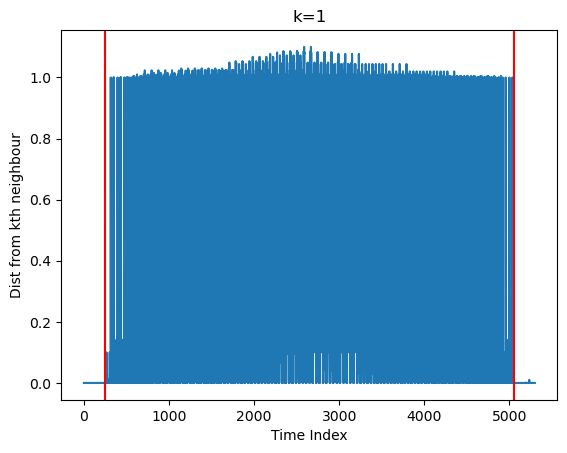

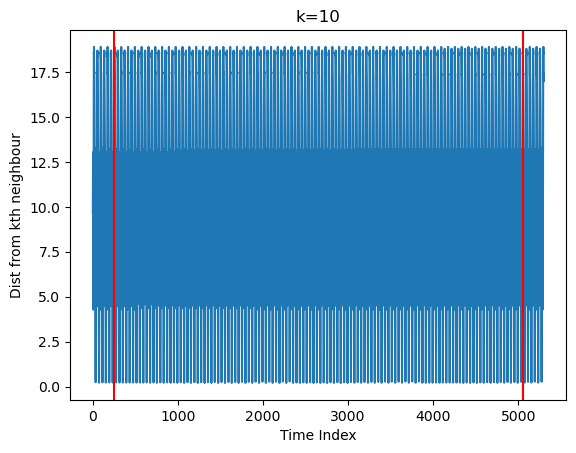

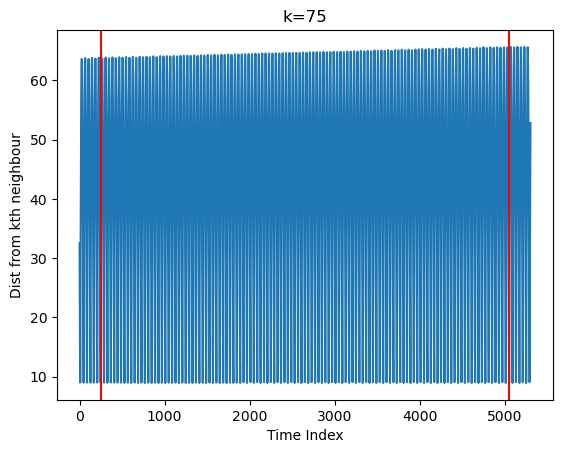

In [18]:
#sanity check for node 52
for k in [1,10,75]: #running through 
    k = int(k)
    dist_100 = np.partition(dist_52[:], kth=k-1, axis=1)[:,k-1]
    plt.title(f"k={k}")
    plt.plot(dist_100)
    plt.axvline(attack_ind52[0], color='red')
    plt.axvline(attack_ind52[-1], color='red')
    plt.xlabel("Time Index")
    plt.ylabel("Dist from kth neighbour")
    plt.show()

In [40]:
#more setup for the final cell
dist_names = [dist_52,dist_53,dist_54,dist_56,dist_57,dist_58,dist_5,dist_66,dist_68,dist_69,dist_70,dist_71,dist_72,dist_73,dist_36,dist_37,dist_38,dist_77,dist_78,dist_79,dist_86,dist_87,dist_88]
attack_ind = [attack_ind52,attack_ind53,attack_ind54,attack_ind56,attack_ind57,attack_ind58,attack_ind5,attack_ind66,attack_ind68,attack_ind69,attack_ind70,attack_ind71,attack_ind72,attack_ind73,attack_ind36,attack_ind37,attack_ind38,attack_ind77,attack_ind78,attack_ind79,attack_ind86,attack_ind87,attack_ind88]
nlist=[]
for i in attack_dict:
    if i in emptyr:
        continue
    else:
        nlist += [i]


[52,
 53,
 54,
 56,
 57,
 58,
 5,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 36,
 37,
 38,
 77,
 78,
 79,
 86,
 87,
 88]

# Visualization of all the distributions

We are doing the same thing as the sanity check, just looping through all the distributions. k = 1,10,100 are chosen.

You can also uncomment the commented code below if you want to save each figure as a png.

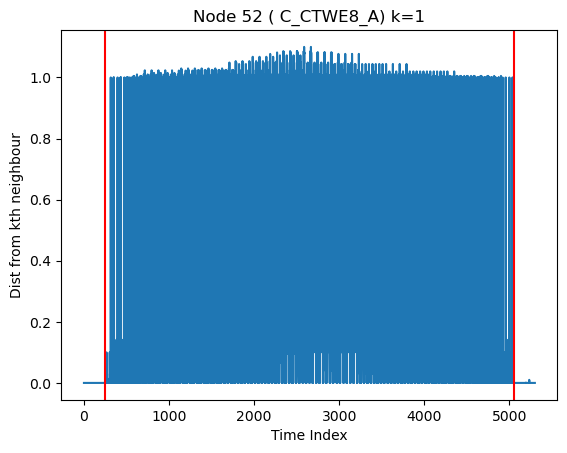

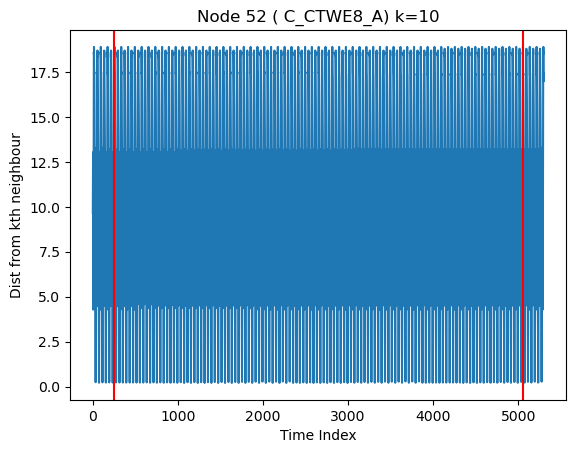

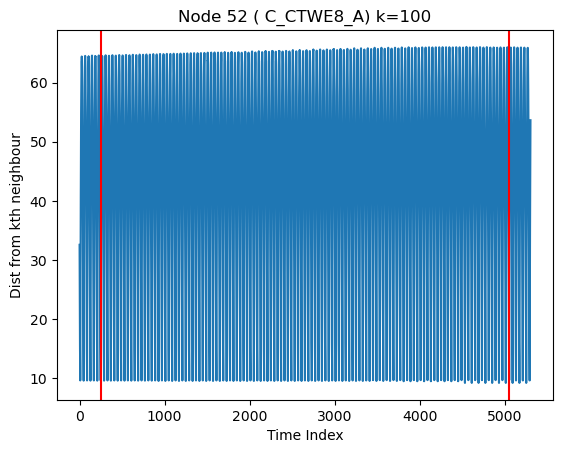

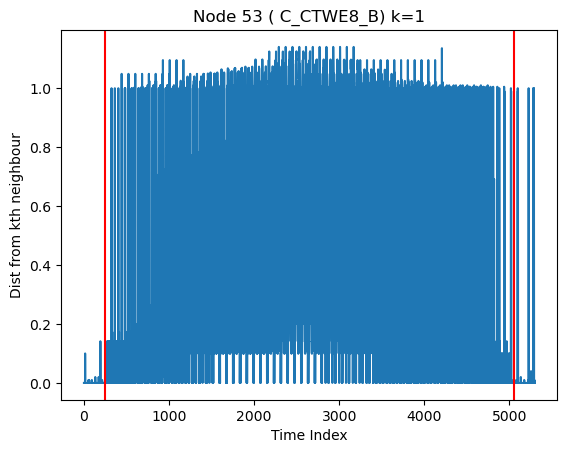

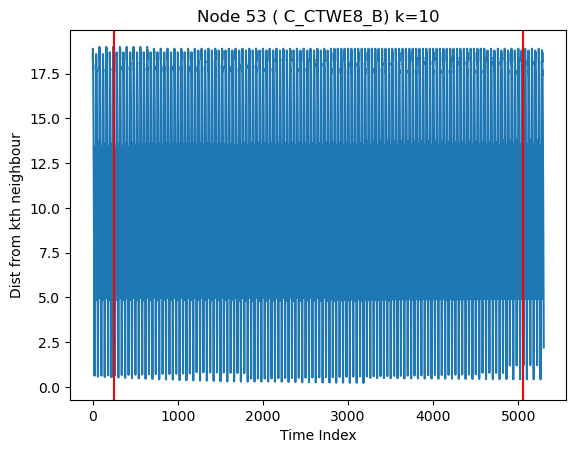

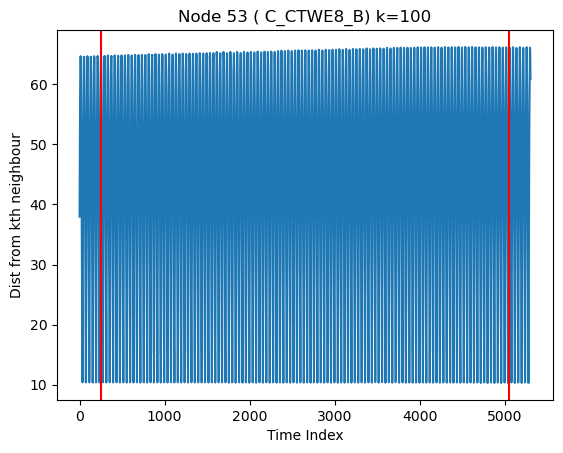

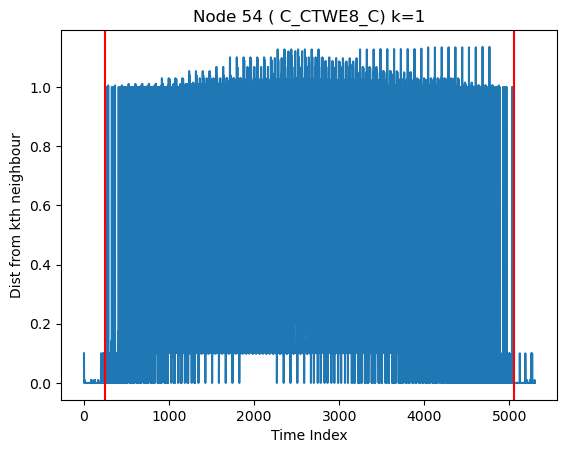

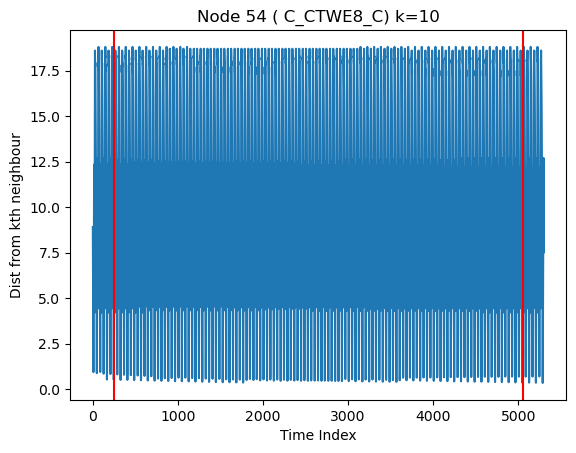

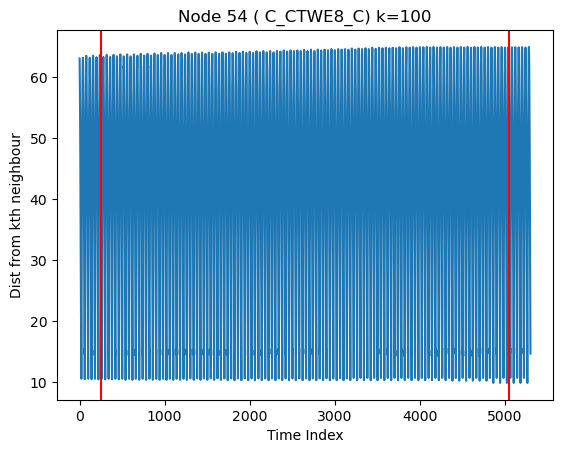

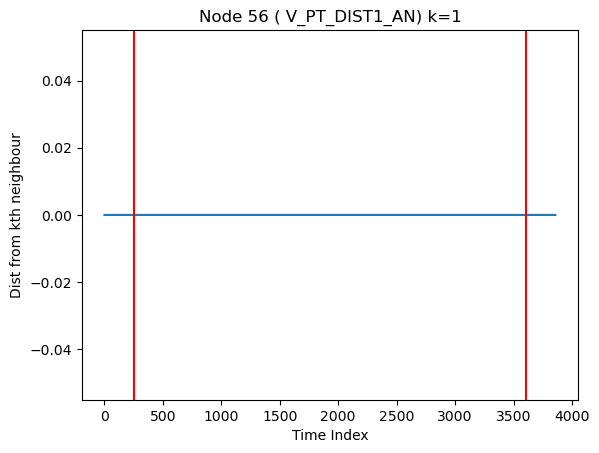

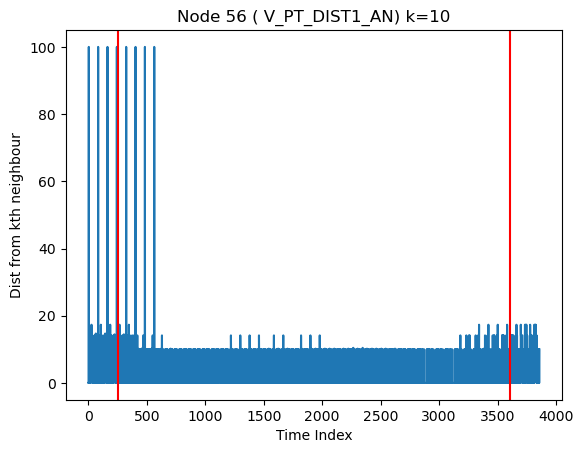

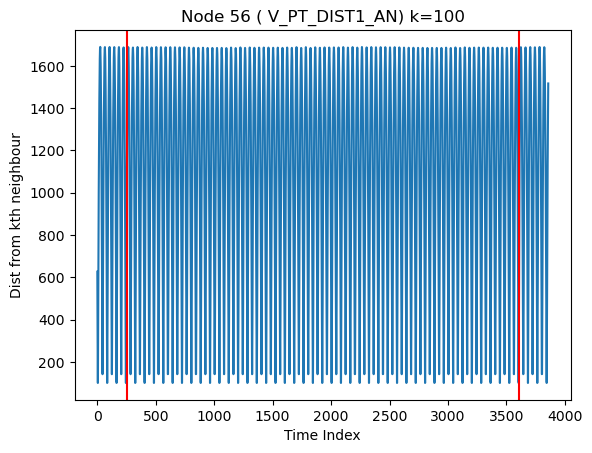

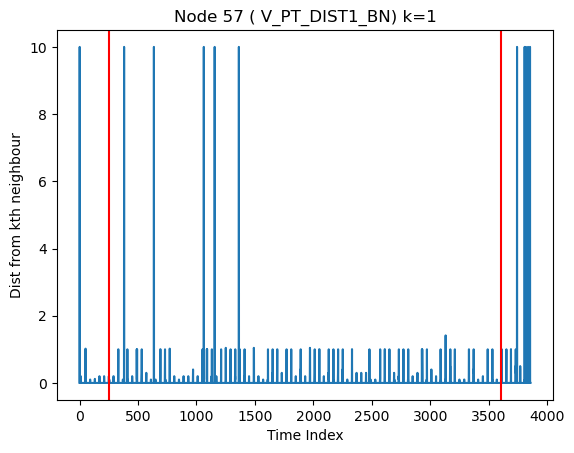

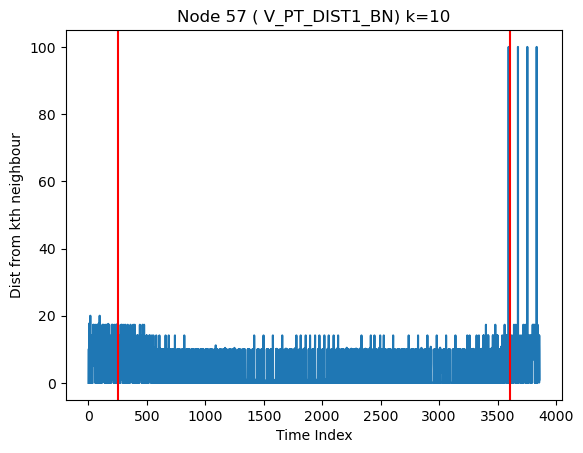

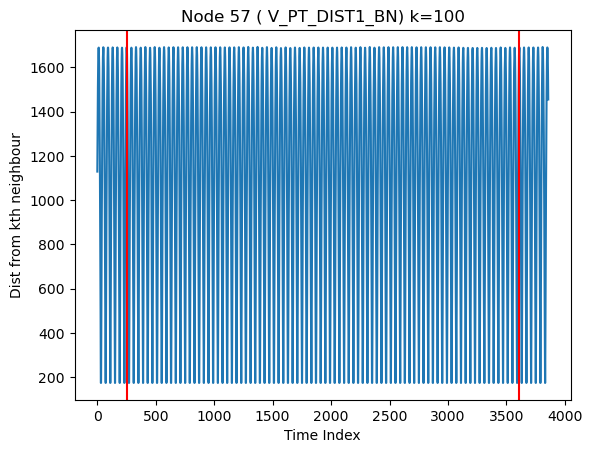

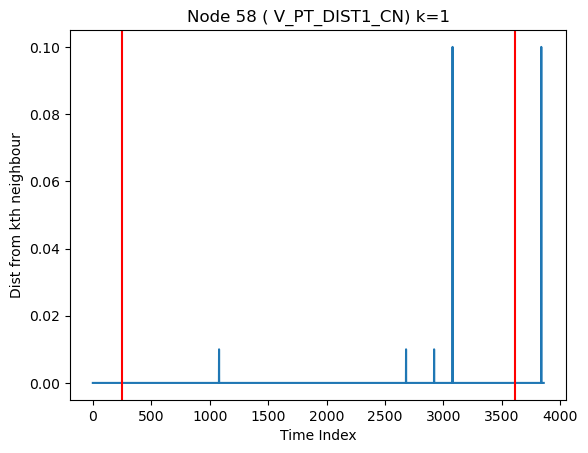

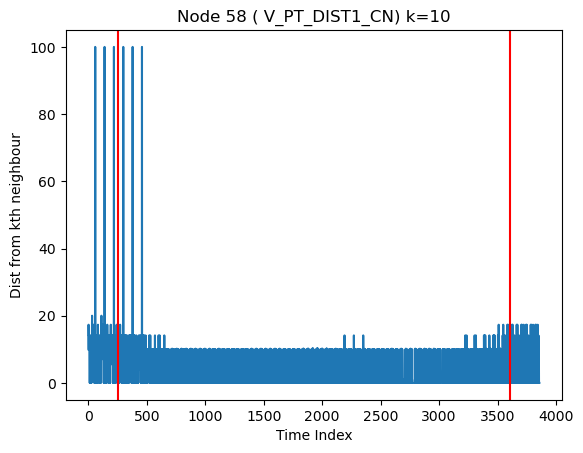

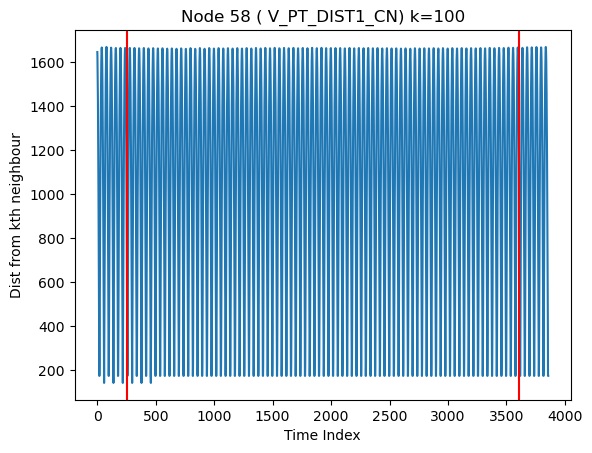

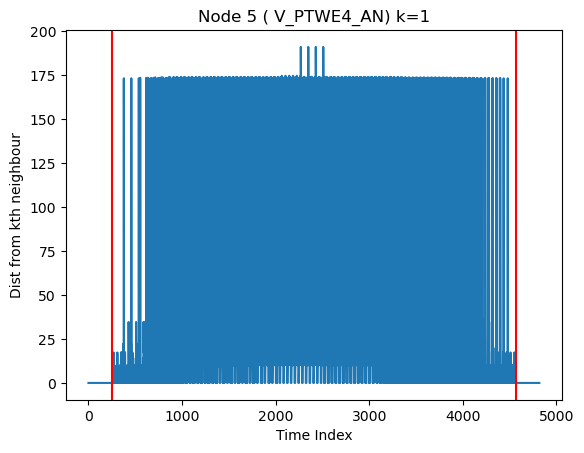

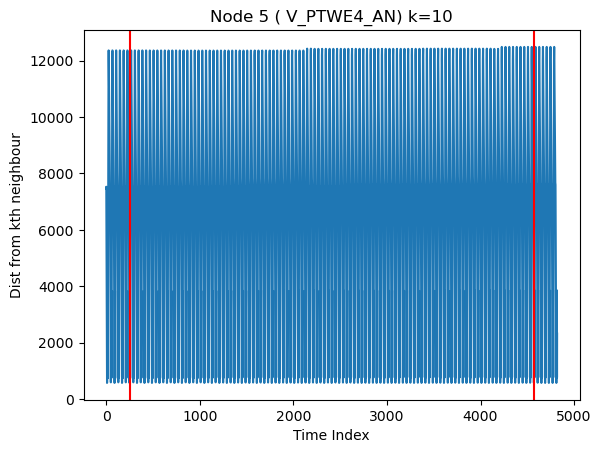

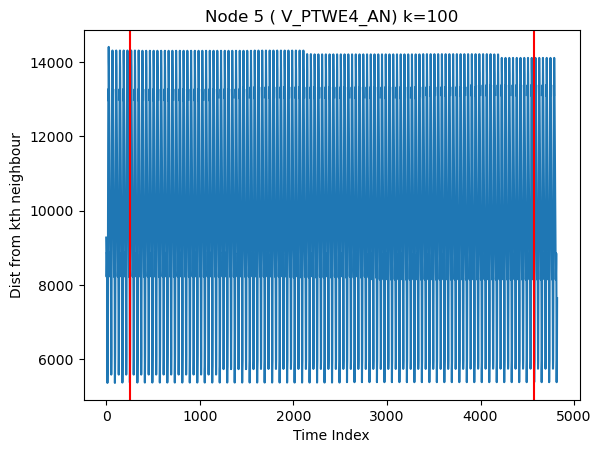

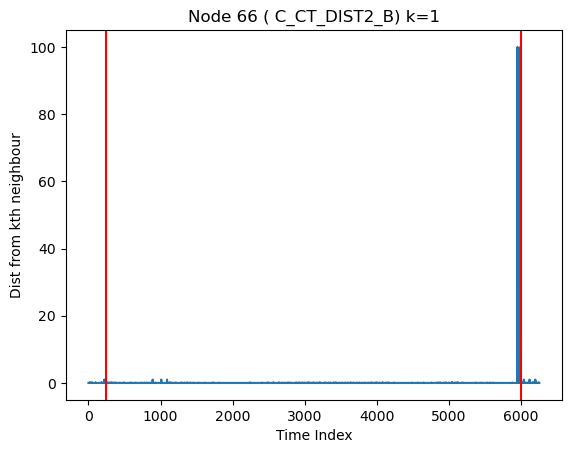

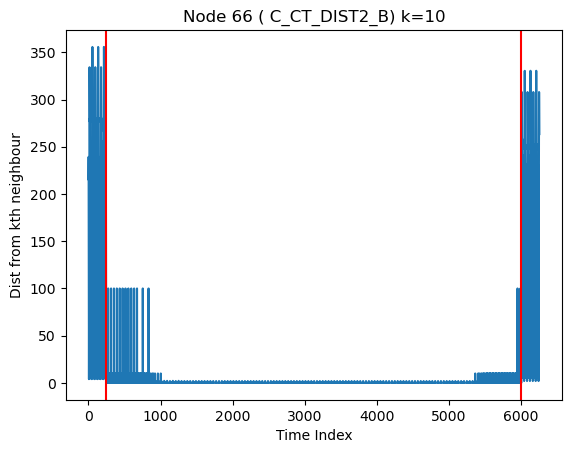

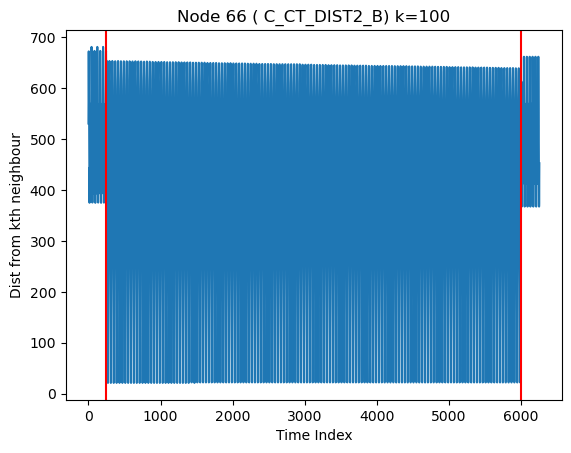

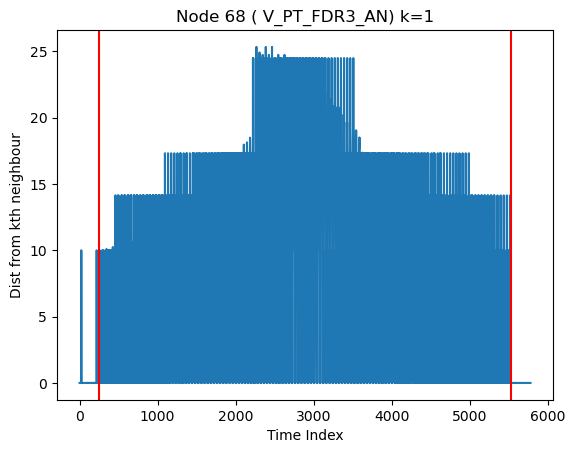

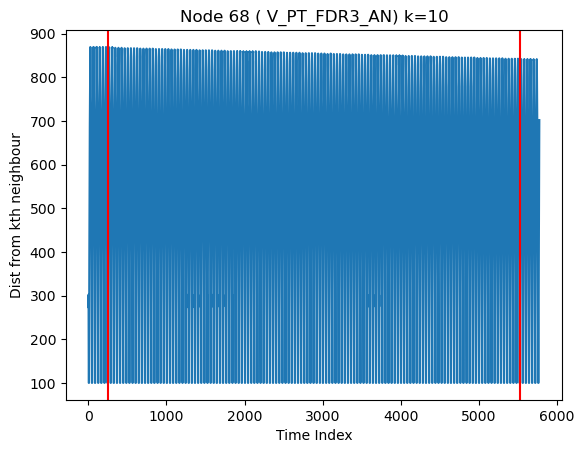

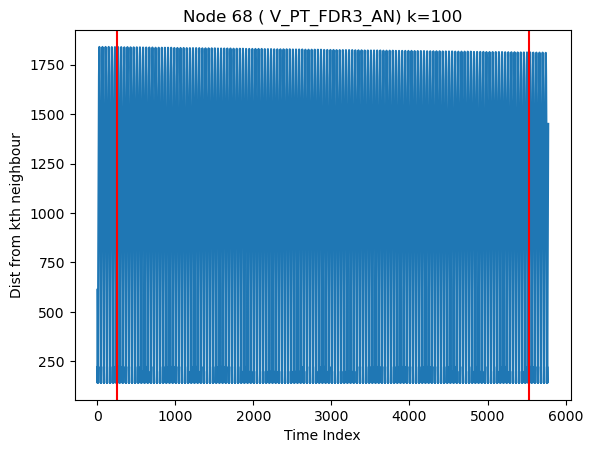

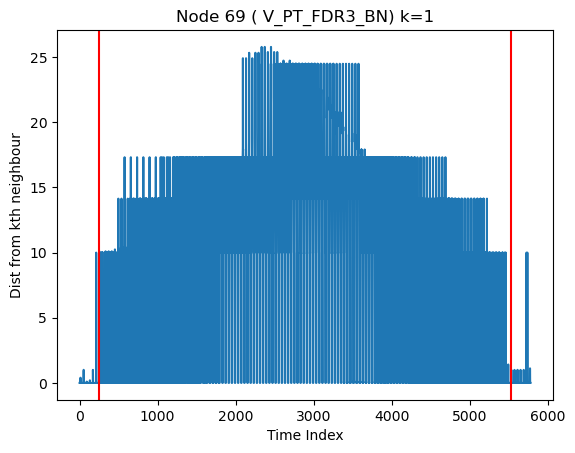

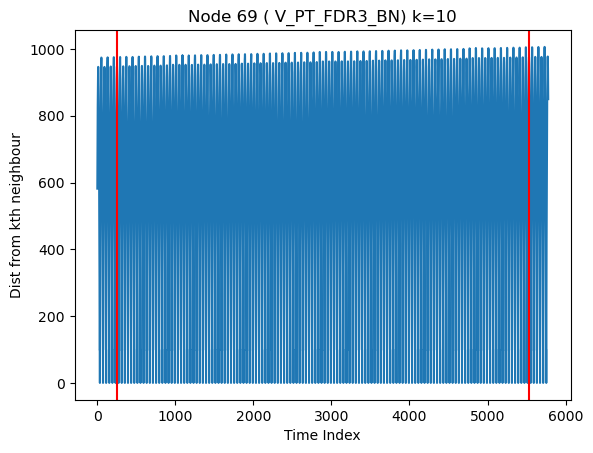

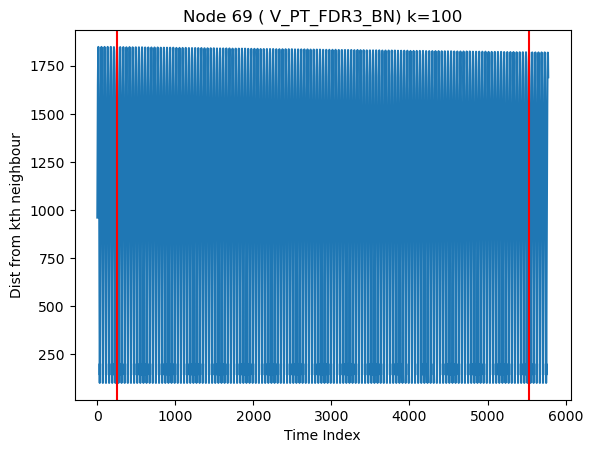

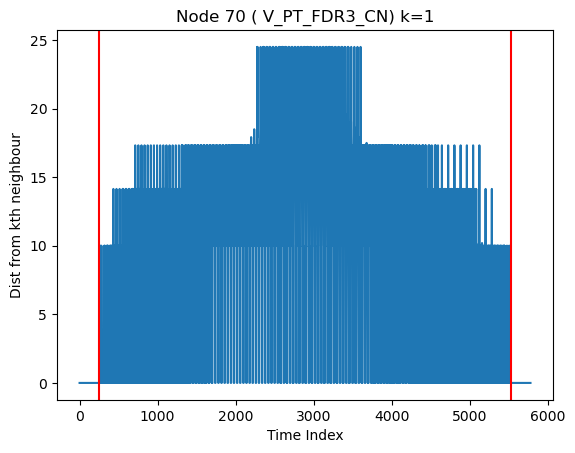

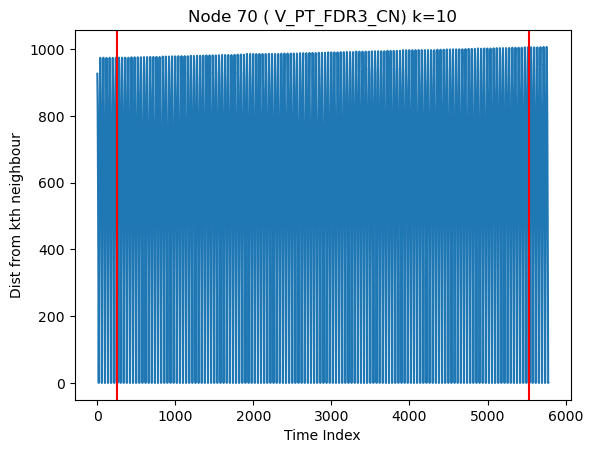

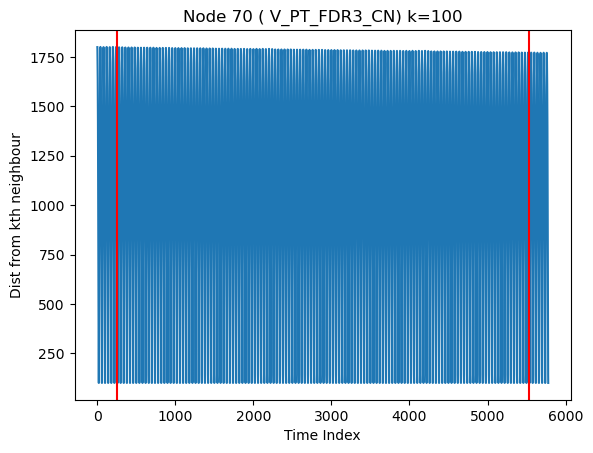

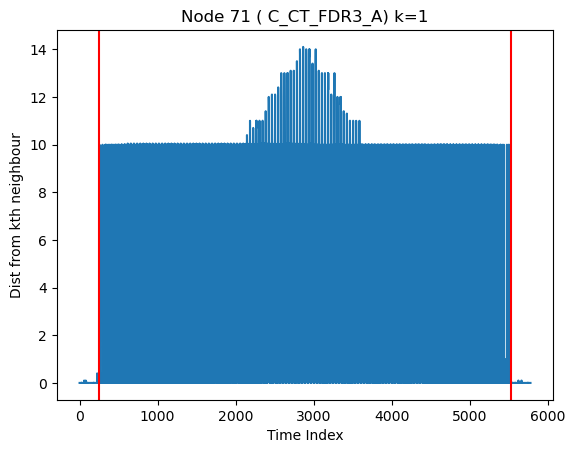

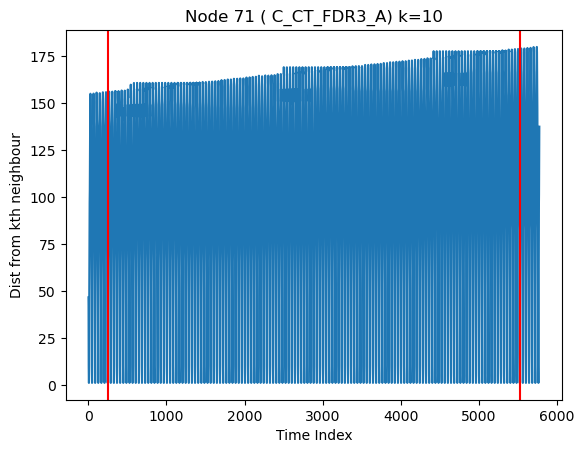

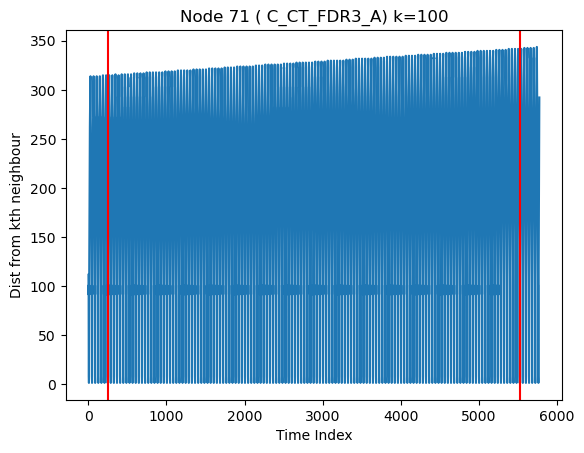

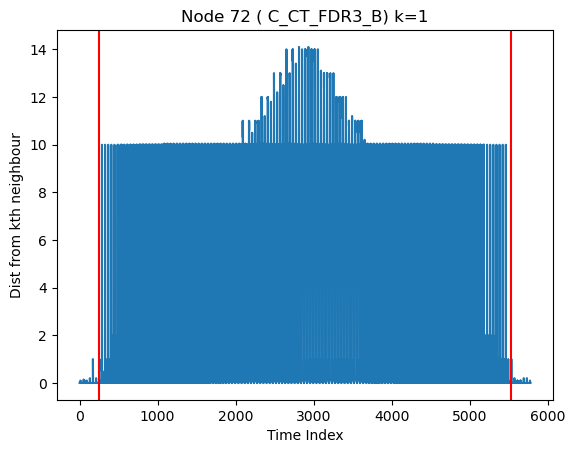

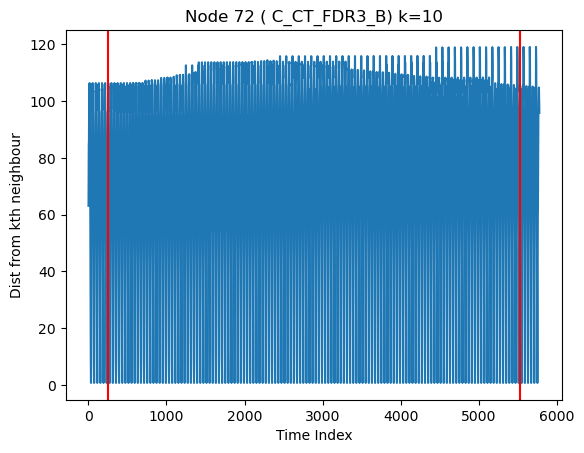

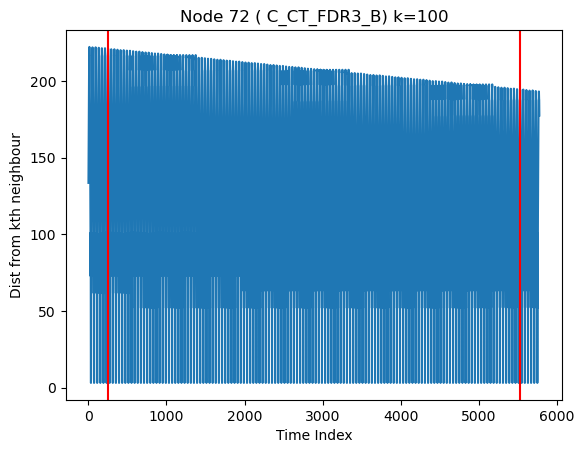

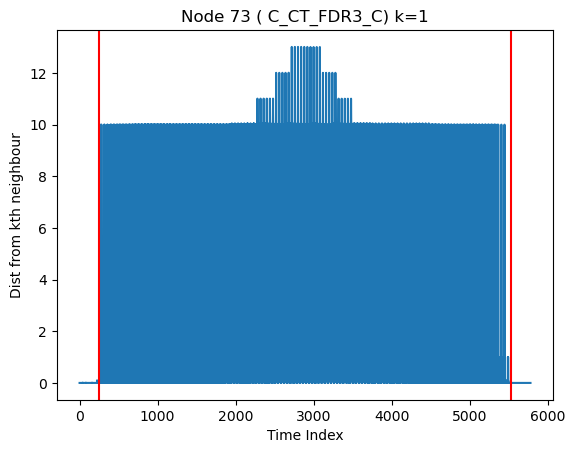

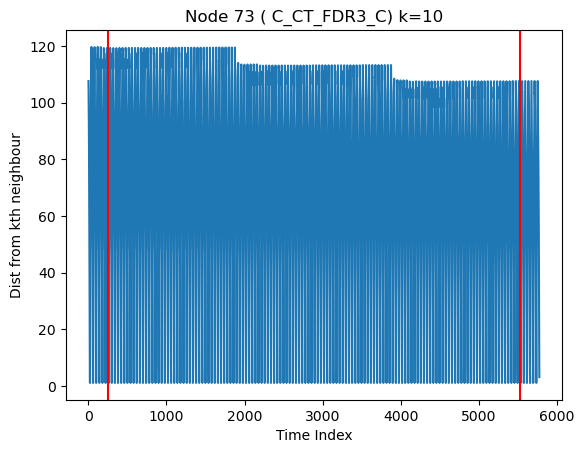

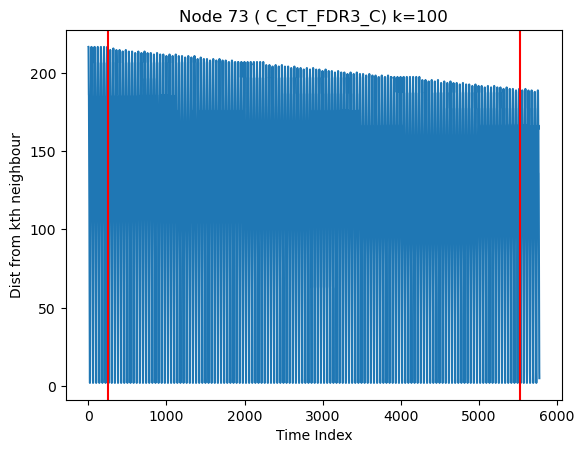

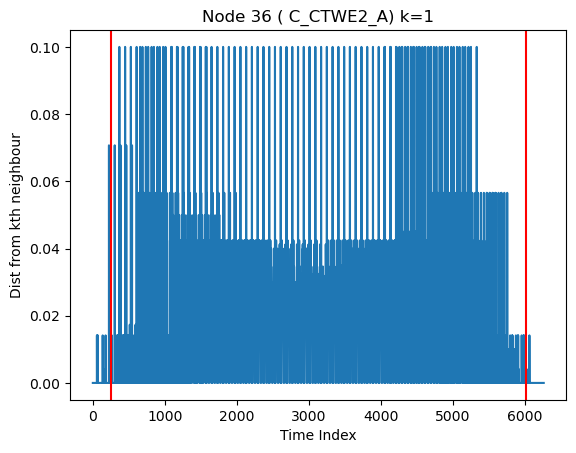

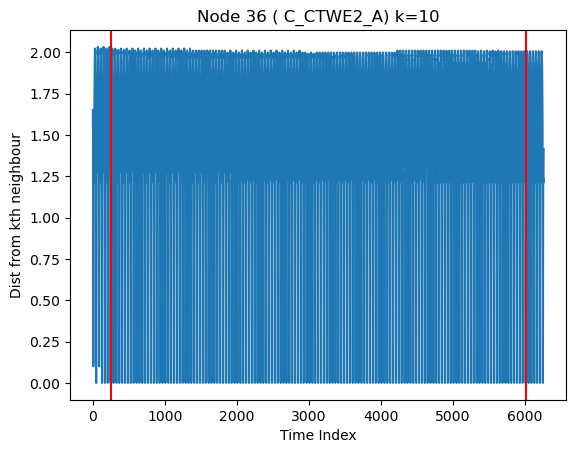

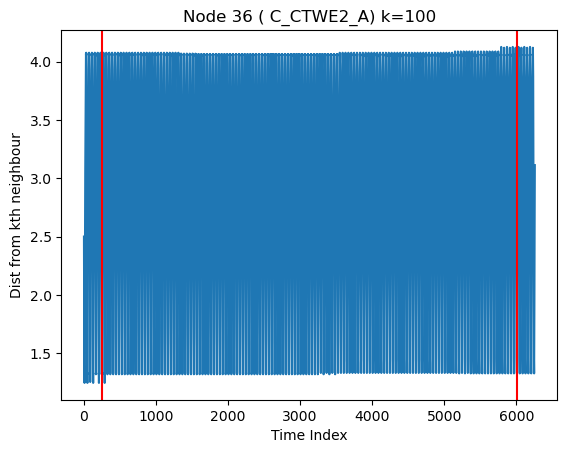

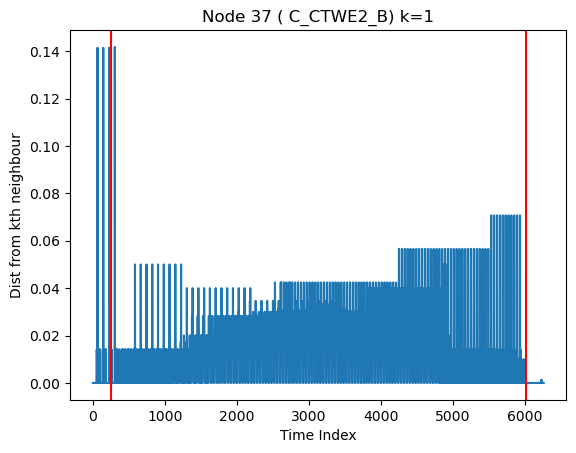

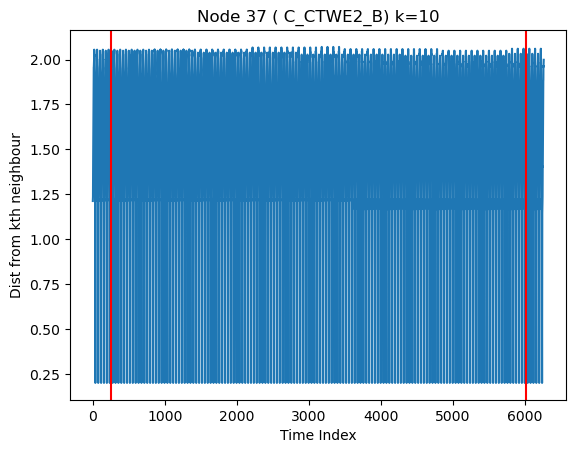

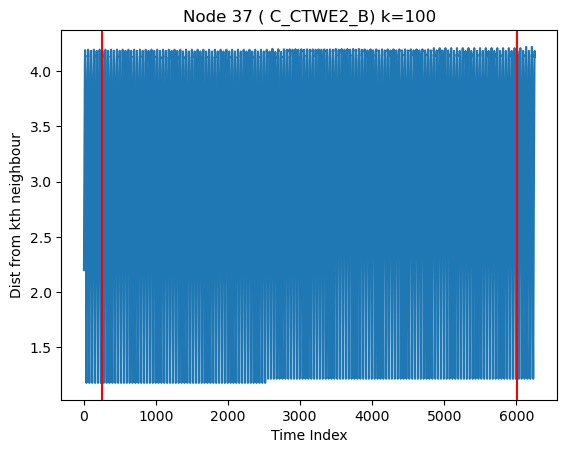

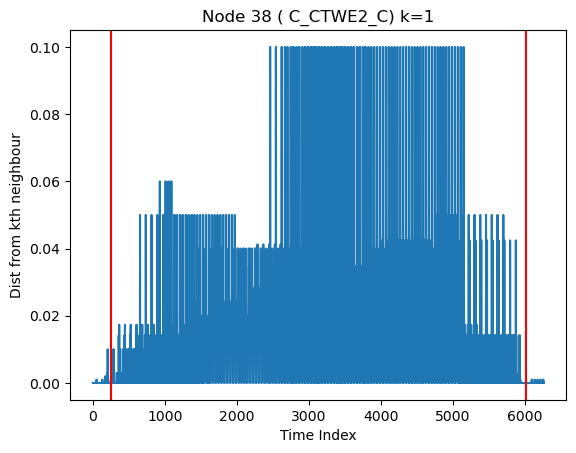

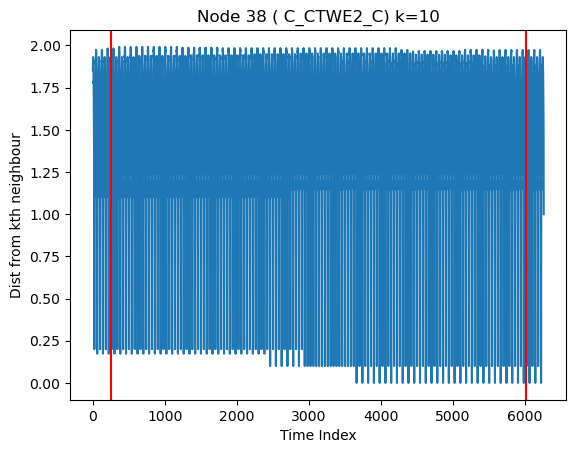

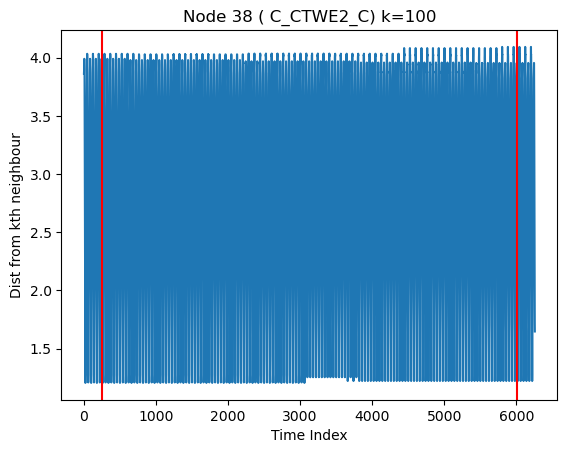

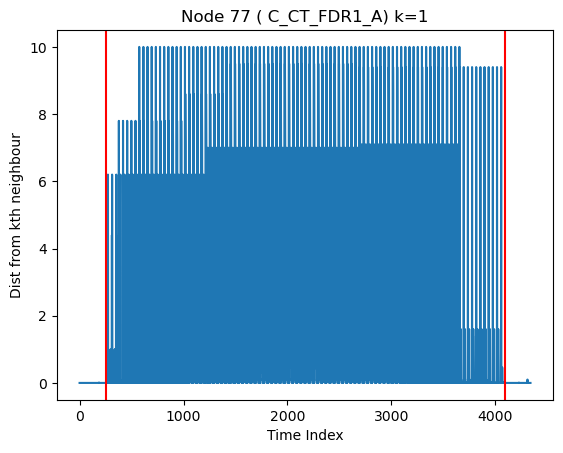

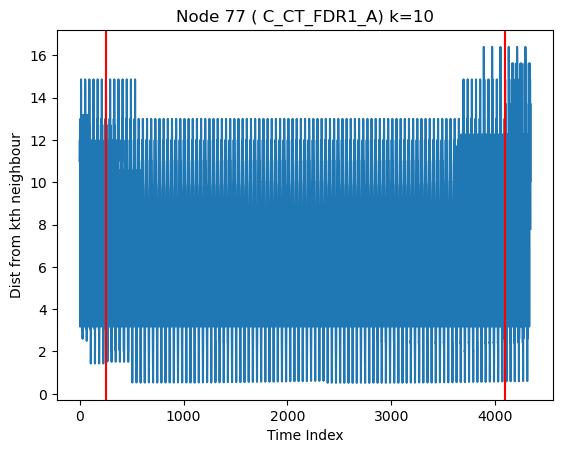

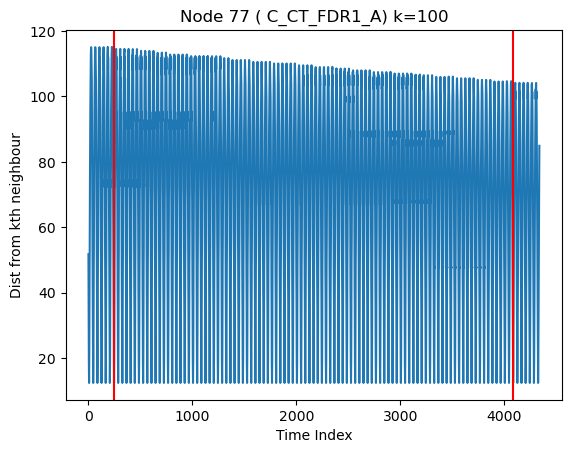

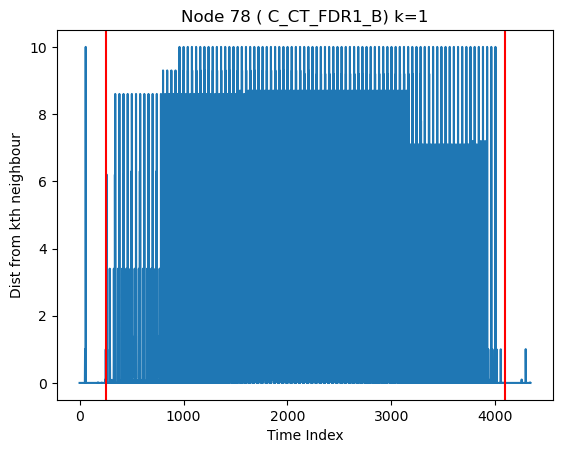

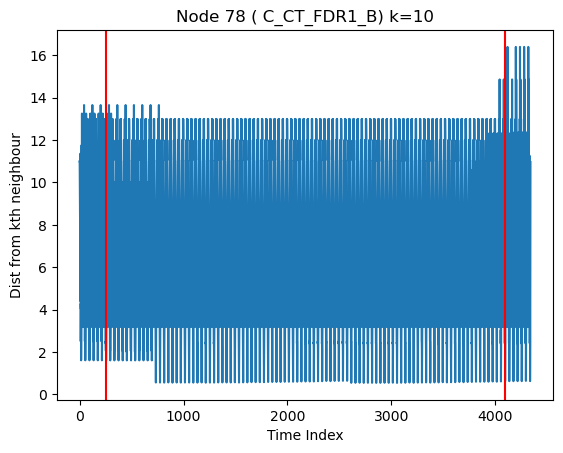

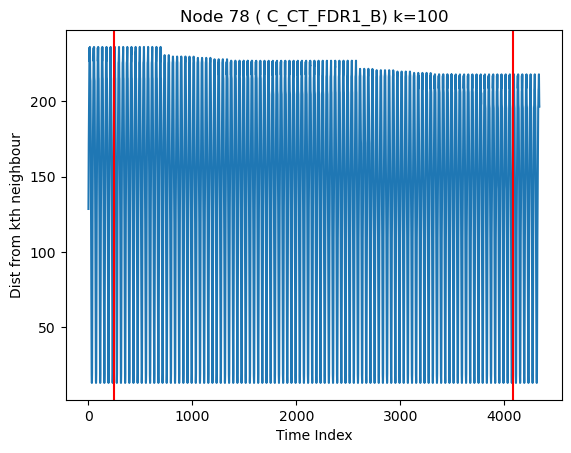

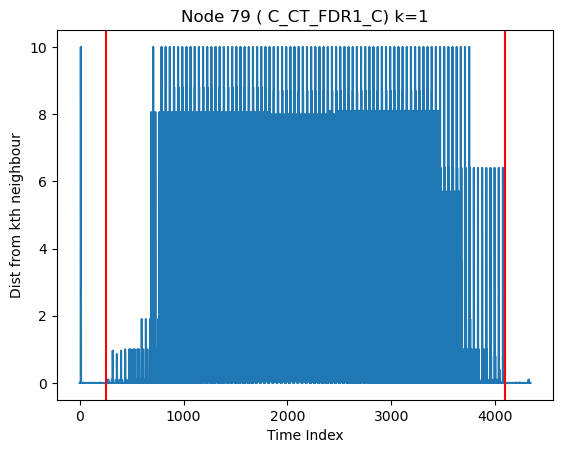

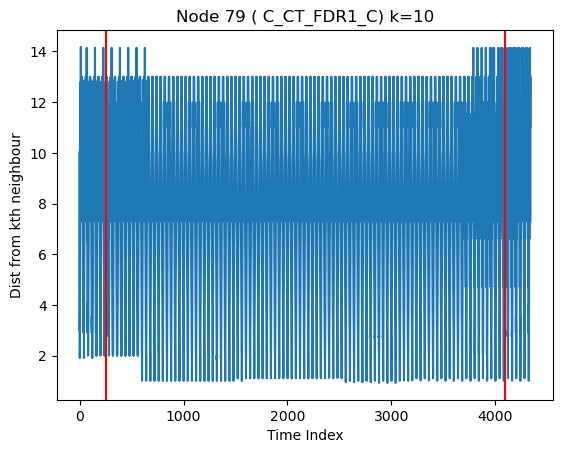

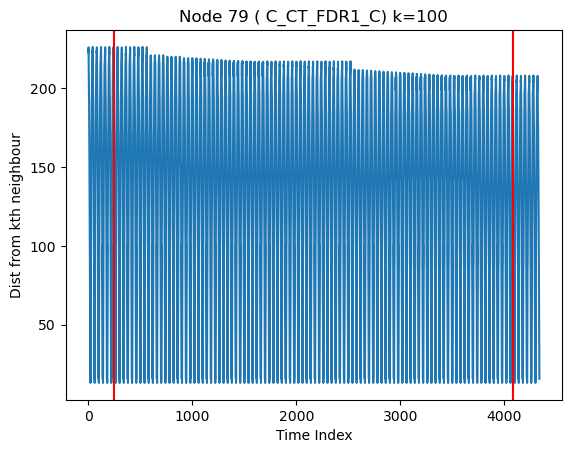

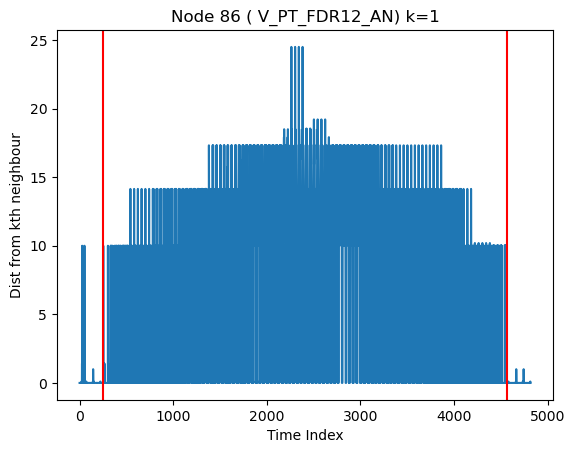

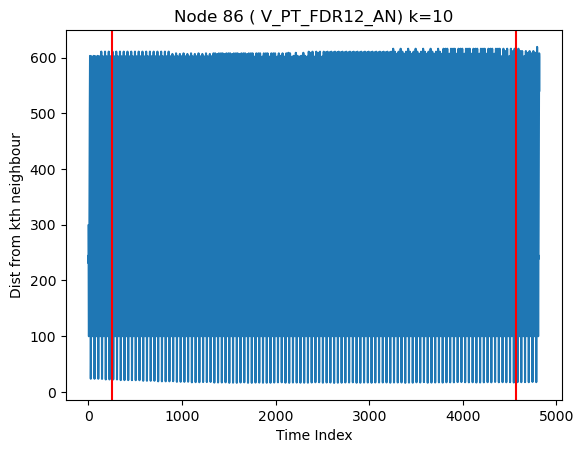

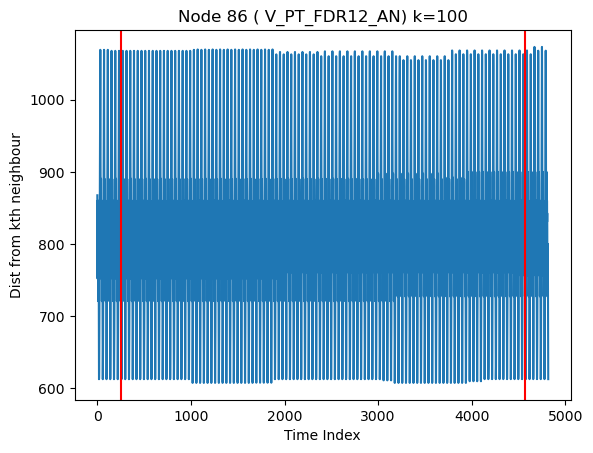

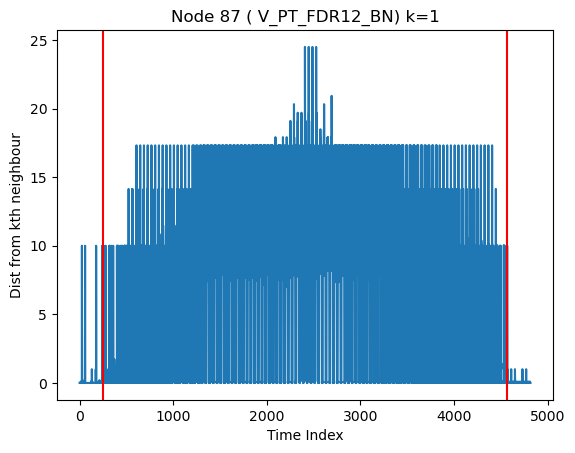

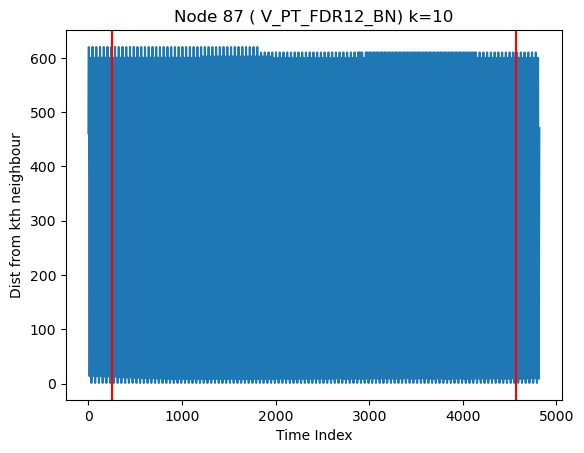

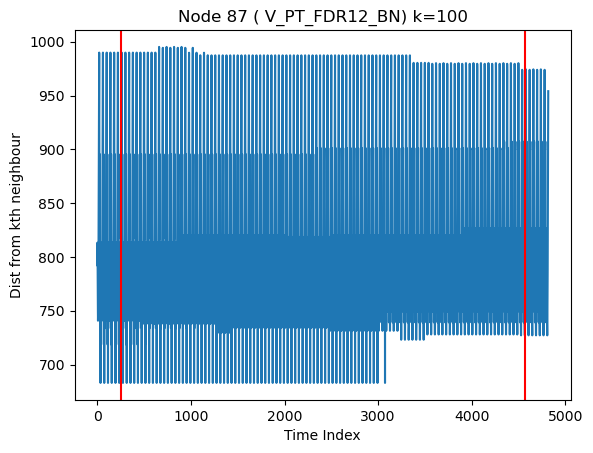

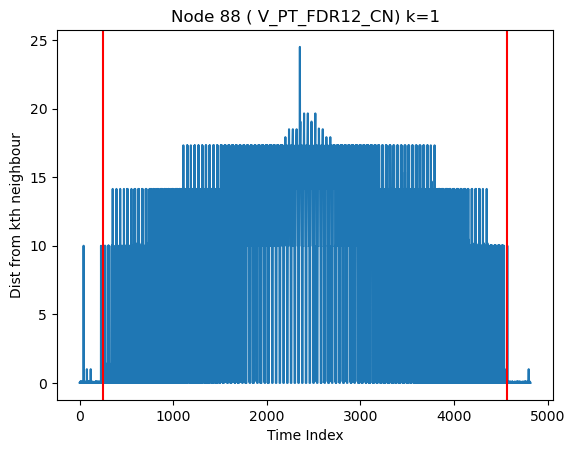

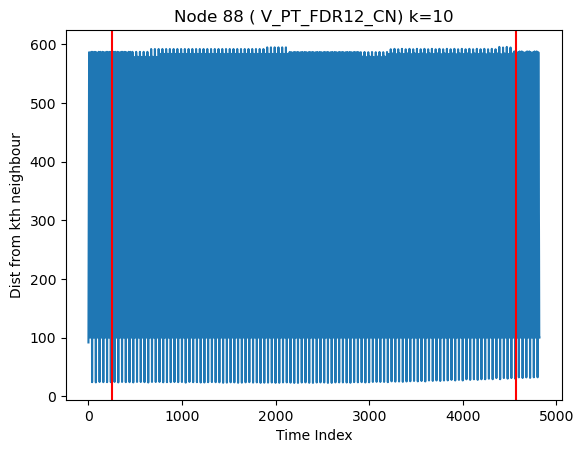

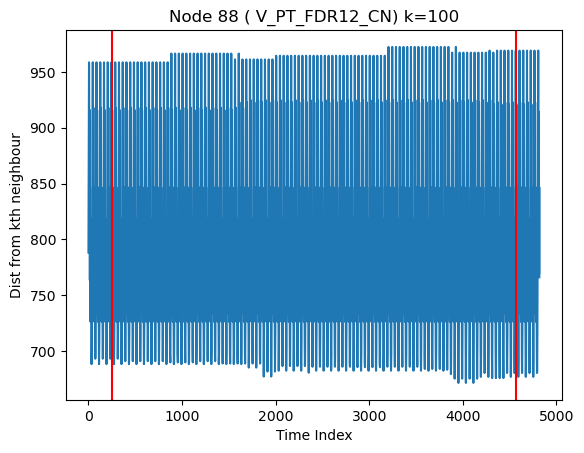

In [41]:
for index, dist_name in enumerate(dist_names):
    for k in [1,10,100]:
        k = int(k)
        dist = np.partition(dist_name[:], kth=k-1, axis=1)[:,k-1]
        name = nlist[index]
        fname = column_list[name]
        plt.title(f"Node {name} ({fname}) k={k}")
        plt.plot(dist)
        plt.axvline(attack_ind[index][0], color='red')
        plt.axvline(attack_ind[index][-1], color='red')
        plt.xlabel("Time Index")
        plt.ylabel("Dist from kth neighbour")
        #uncomment code below if you want to save it as a png
        plt.savefig(f'k{k}_test{name}.png') 
        plt.show()
    